In [28]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


<IPython.core.display.Javascript object>


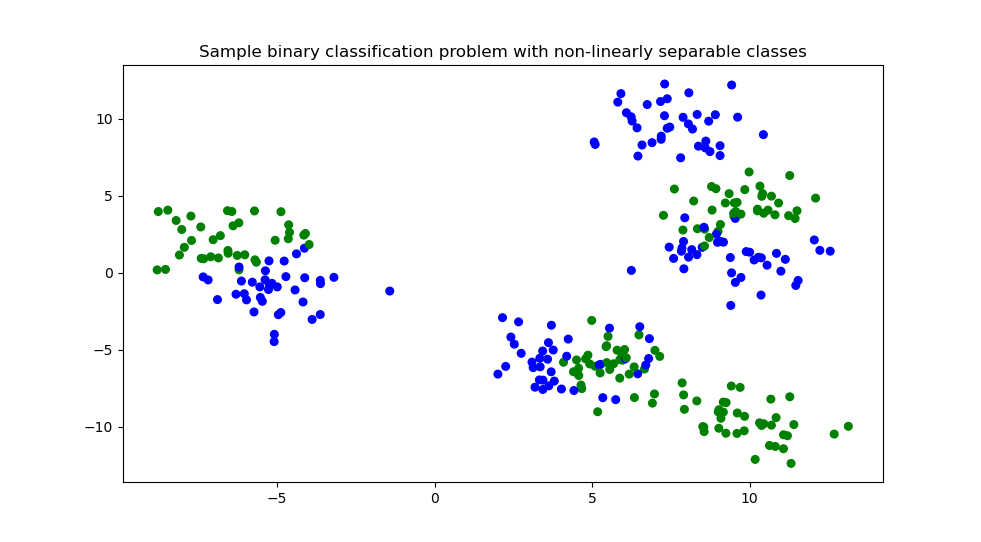

In [29]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
def normalize(X_train, X_test):
        scaler= MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled
X_train_scaled, X_test_scaled  = normalize(X_train, X_test)


k_best = 0 
score_best = 0 

for n_neighbors in range(1,200):
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_train_scaled, y_train)
    score = clf.score (X_test_scaled, y_test)
    if score > score_best:
        score_best = score
        k_best = n_neighbors


In [31]:
print (f'The best k = {k_best} , score = {score_best}')

The best k = 18 , score = 0.9466666666666667
